In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path='/content/drive/MyDrive/cleaned_Medical_Inventory.xlsx'
df=pd.read_excel(path)
df.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1,Bill_Month,Bill_Day,Bill_Year
0,Sale,1.201809e+10,Specialisation6,Department1,2022-01-06,48.084884,20.406434,26288.496493,15993.851364,1016.912032,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS,1,6,2022
1,Sale,1.201801e+10,Specialisation7,Department1,2022-07-23,48.678307,9.247658,20000.416845,22071.682256,1910.837804,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES,7,23,2022
2,Sale,1.201803e+10,Specialisation2,Department3,2022-06-23,123.084559,13.283797,12708.773741,34119.718842,6316.701129,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM,6,23,2022
3,Sale,1.201807e+10,Specialisation40,Department1,2022-03-17,139.195047,20.002381,11291.388273,5846.094560,1069.924893,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS,3,17,2022
4,Sale,1.201810e+10,Specialisation5,Department1,2022-12-21,81.483070,46.695244,21373.408415,3385.996380,7377.217162,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM,12,21,2022


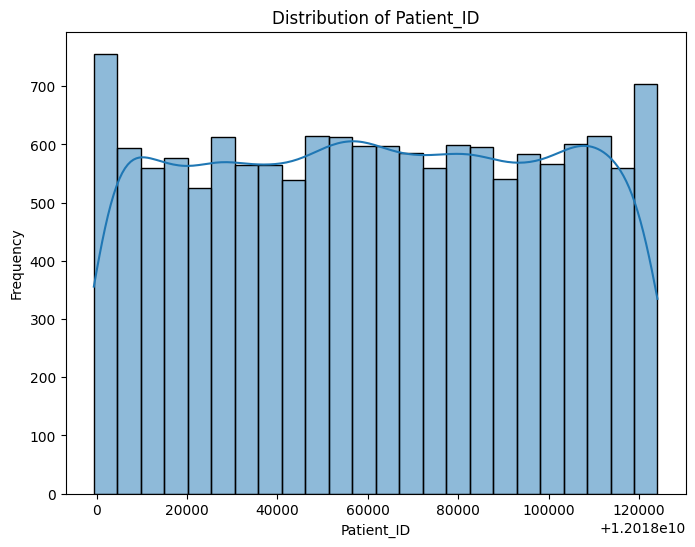

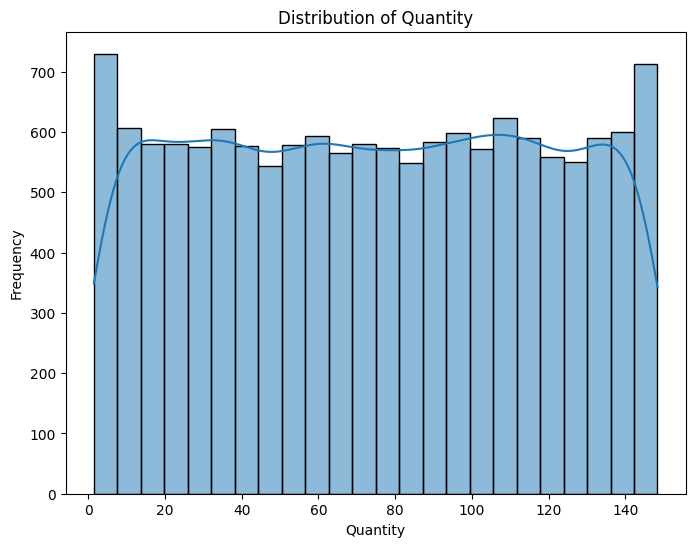

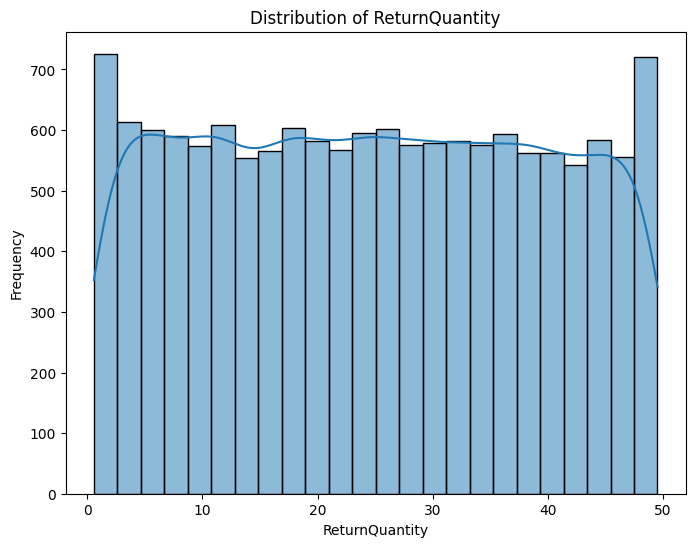

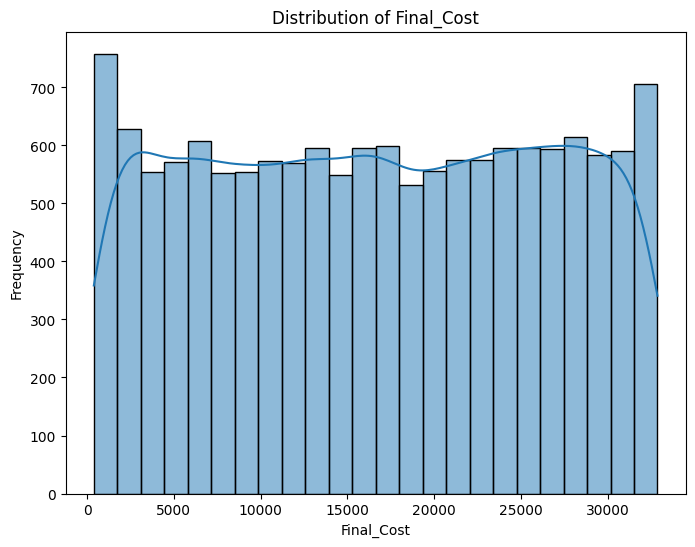

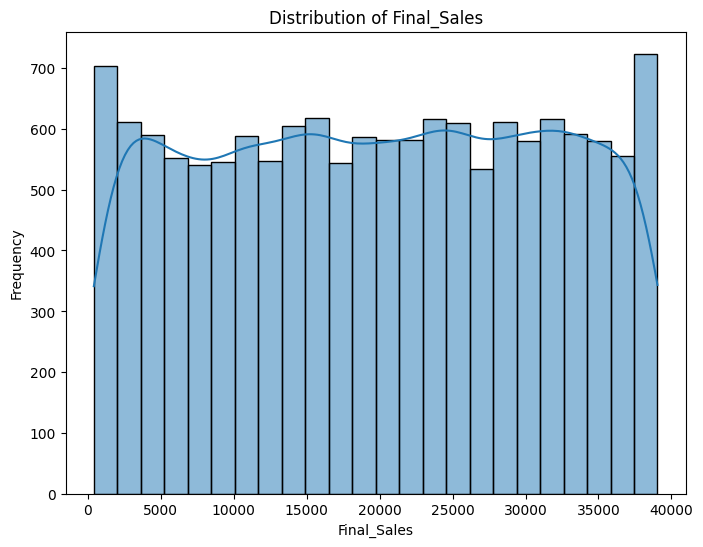

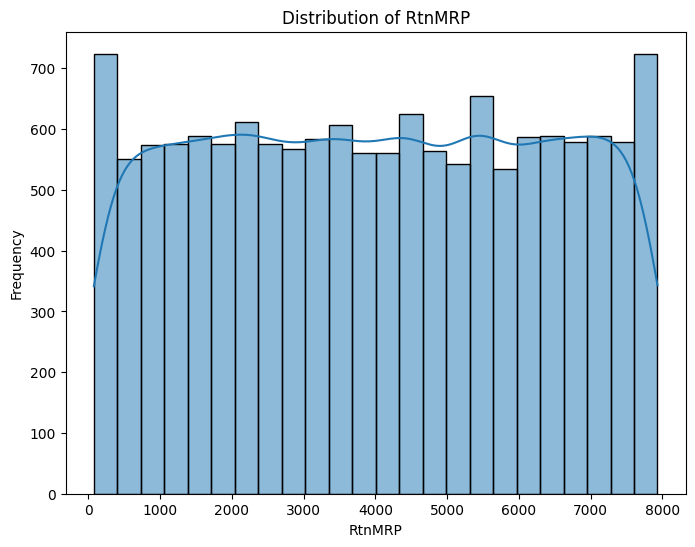

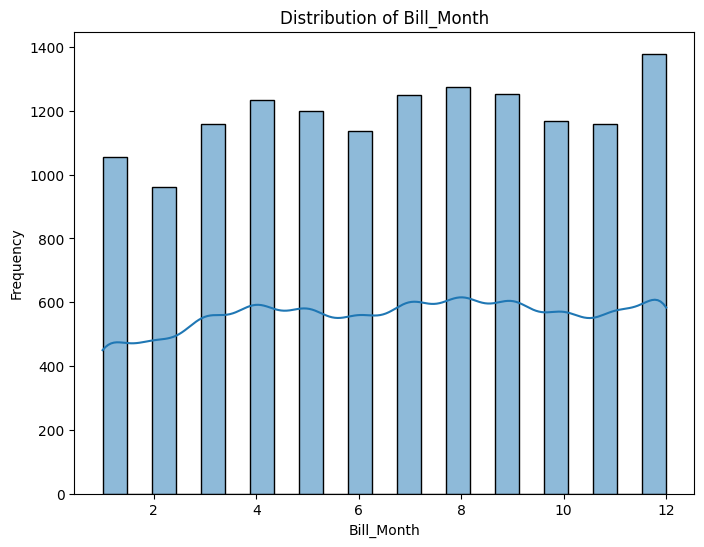

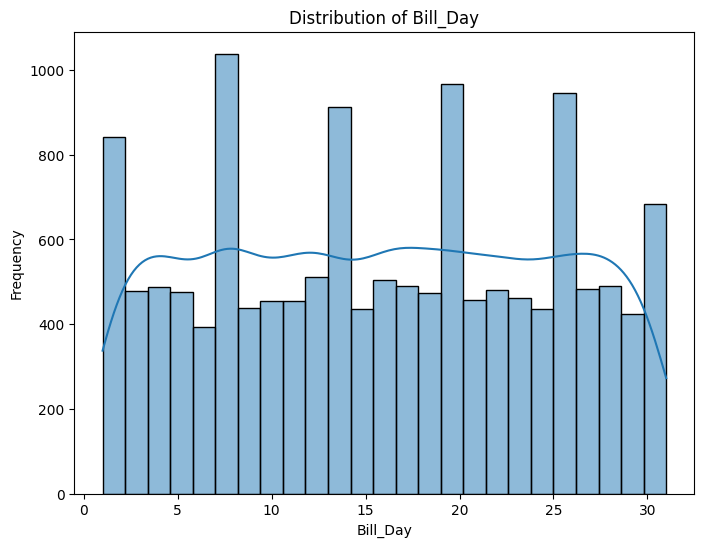

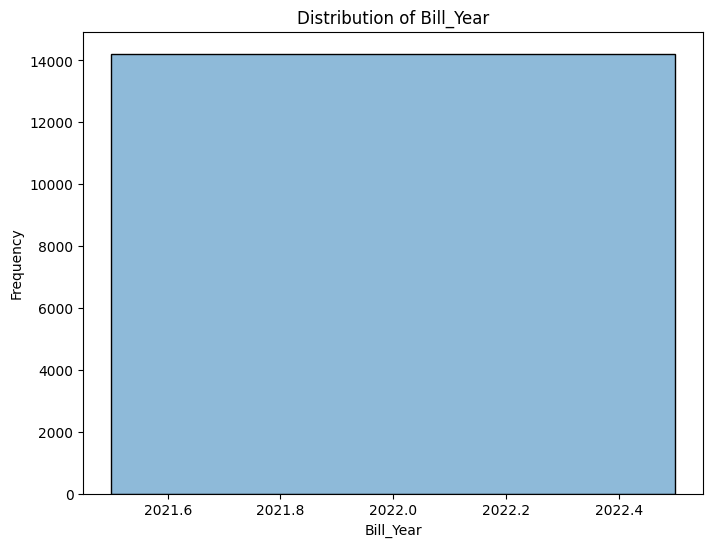

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

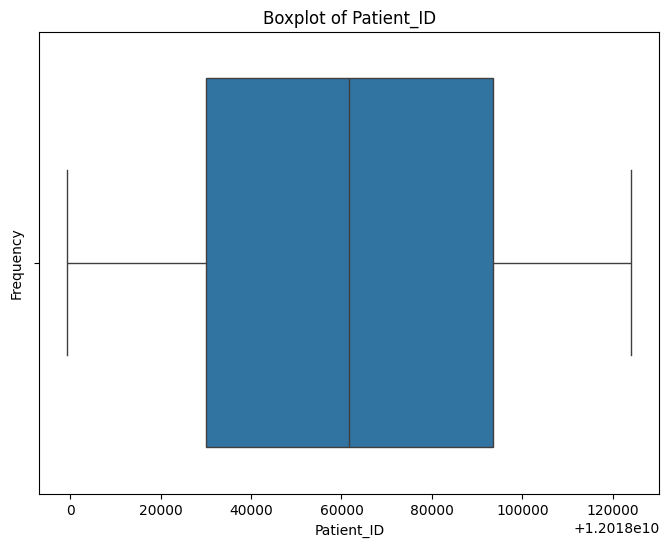

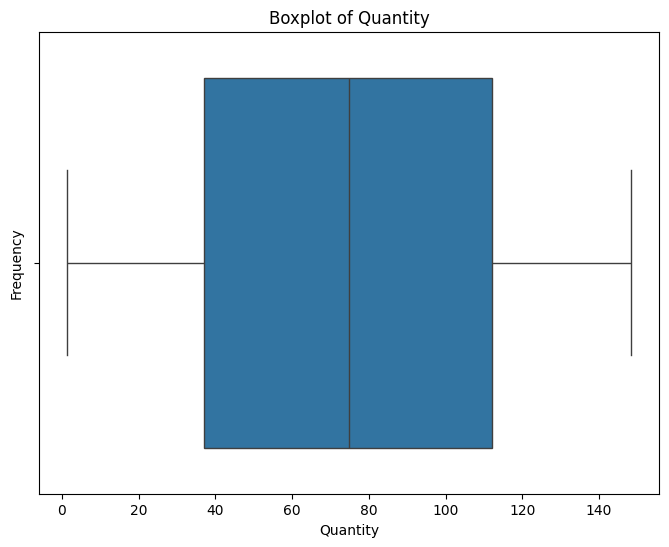

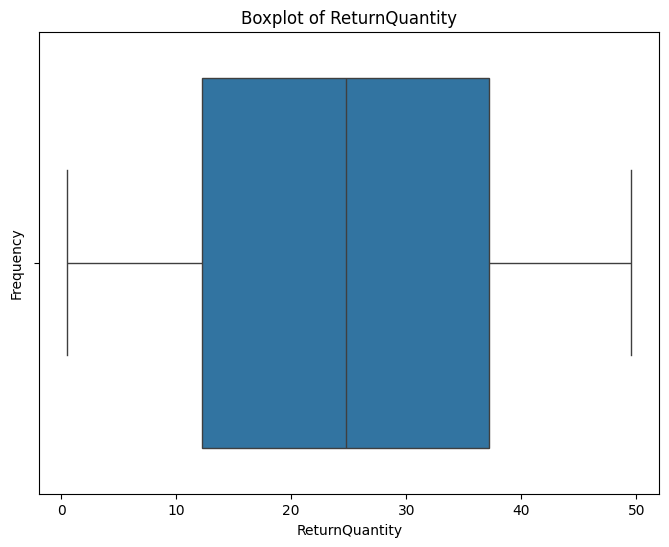

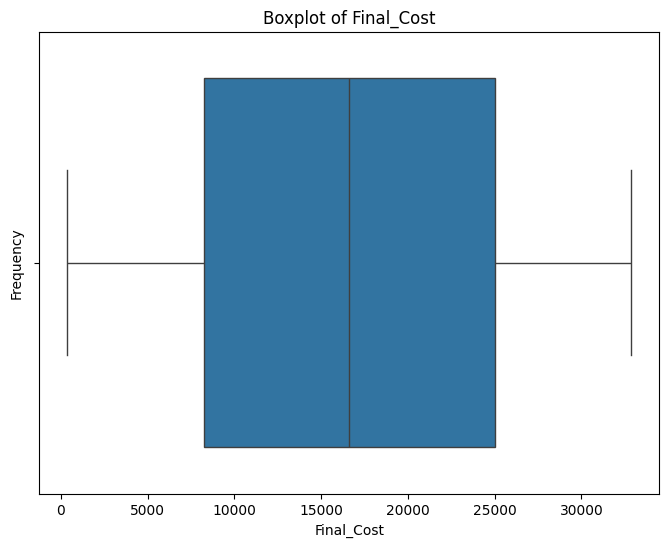

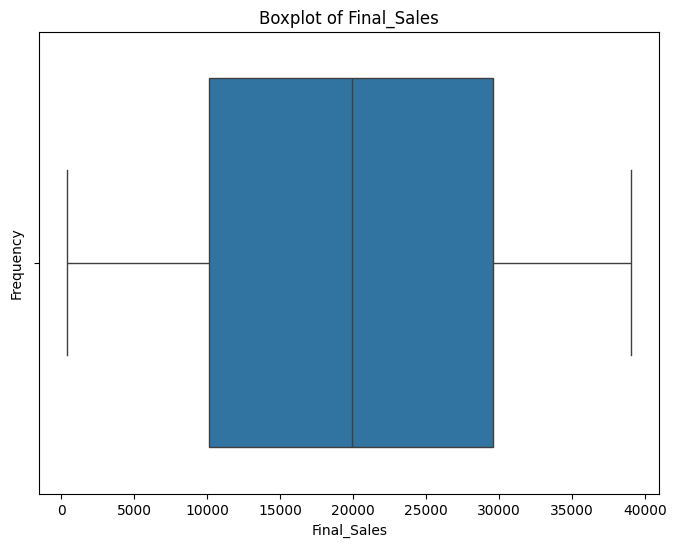

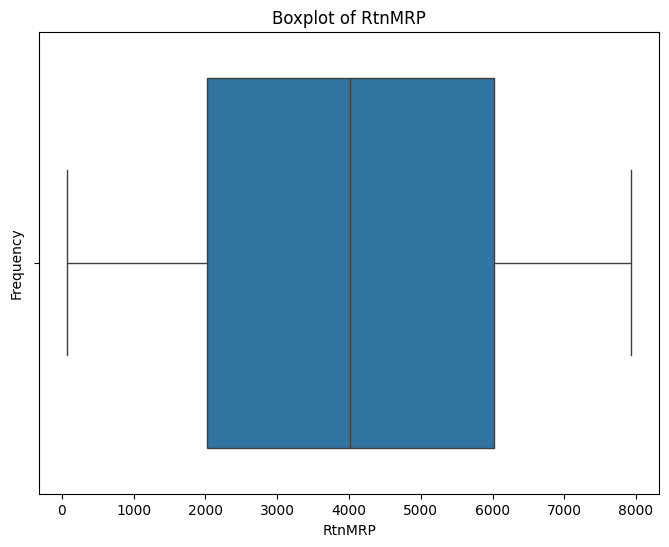

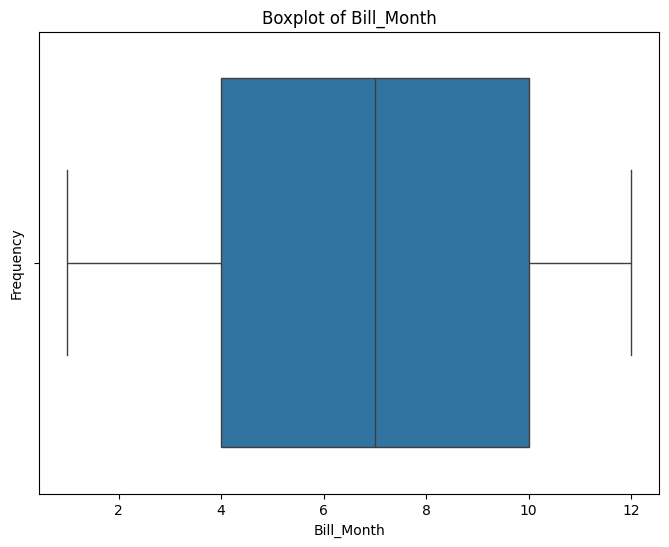

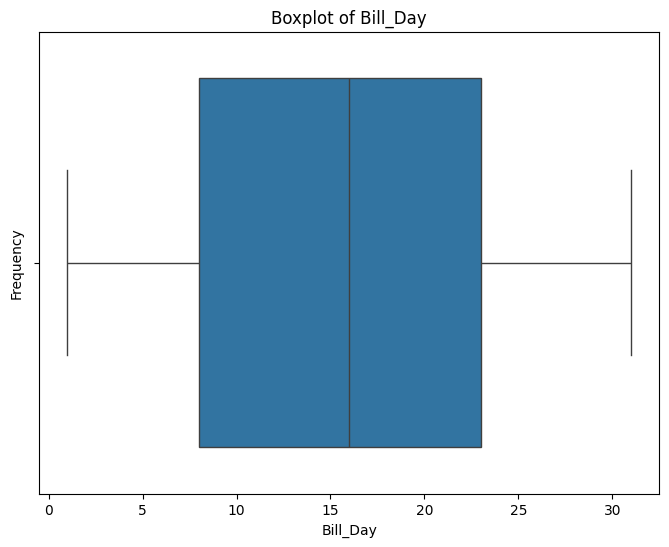

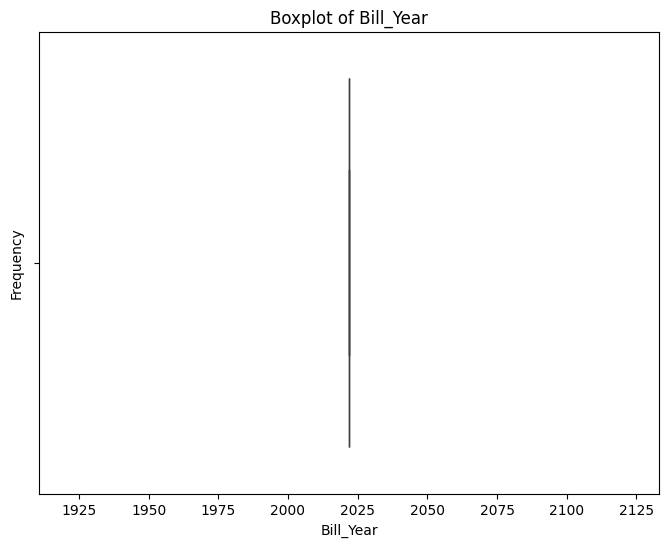

In [9]:
numerical_coll=df.select_dtypes(include=np.number).columns
for col in numerical_coll:
  plt.figure(figsize=(8,6))
  sns.boxplot(data=df,x=col)
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

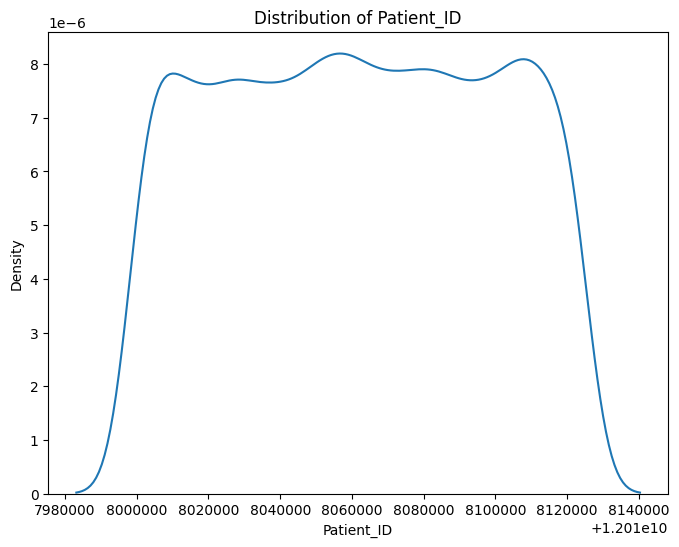

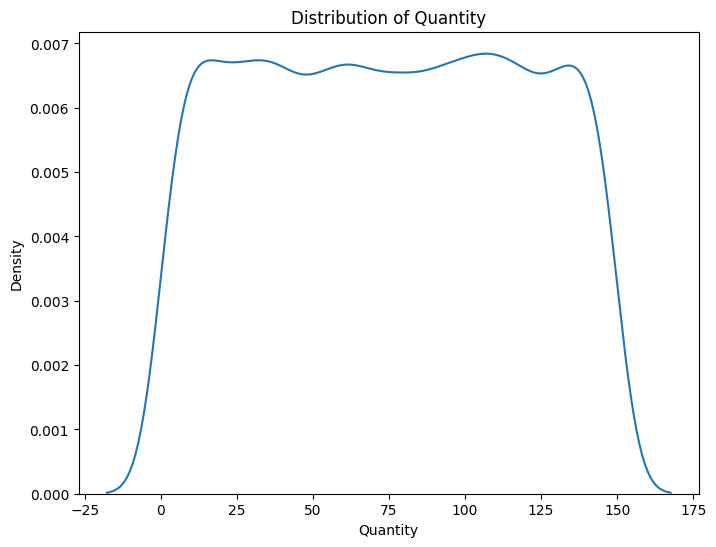

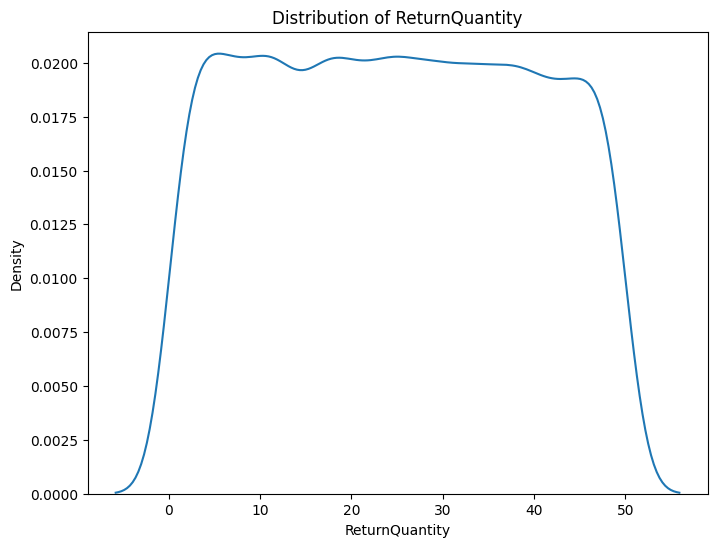

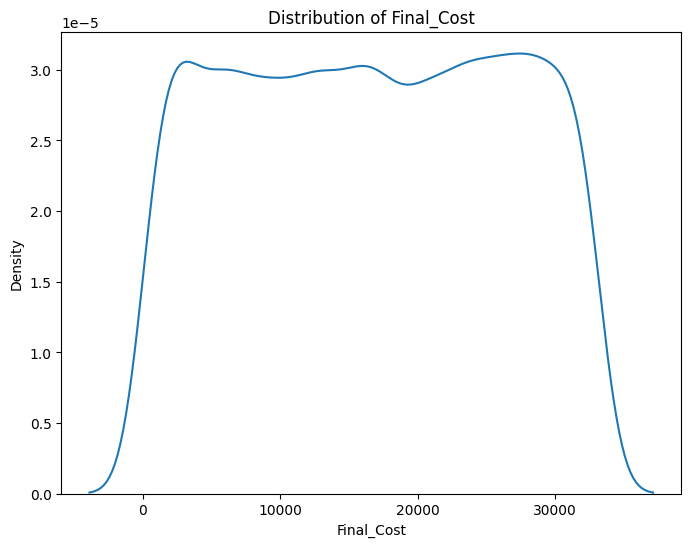

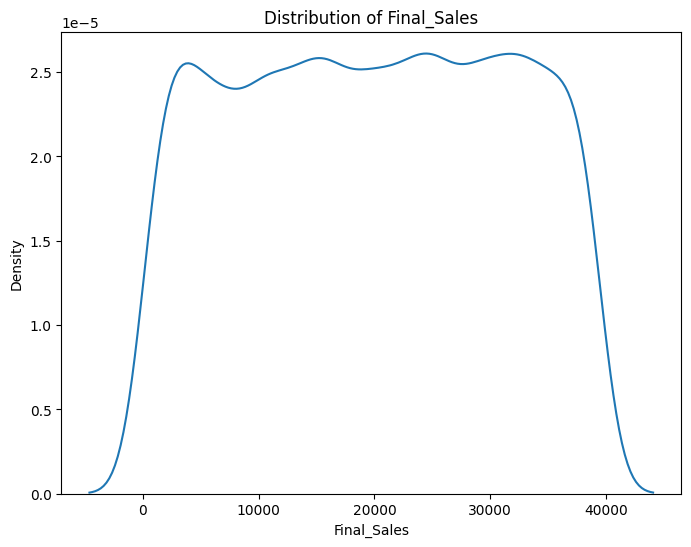

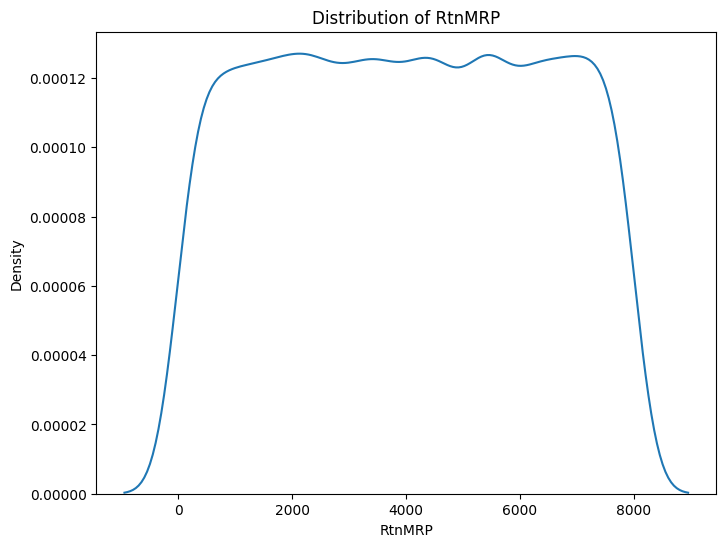

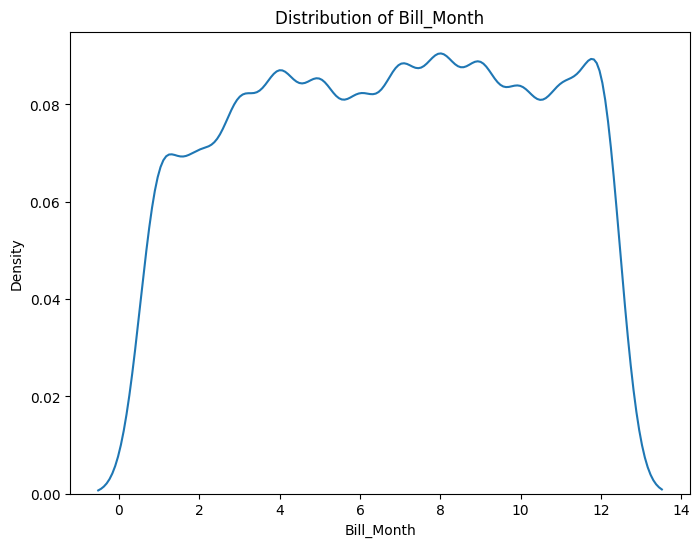

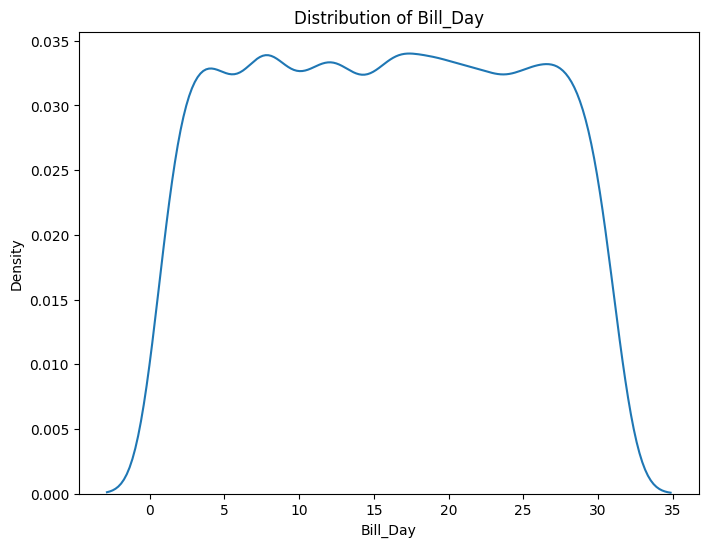

/tmp/ipython-input-2450261393.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col)


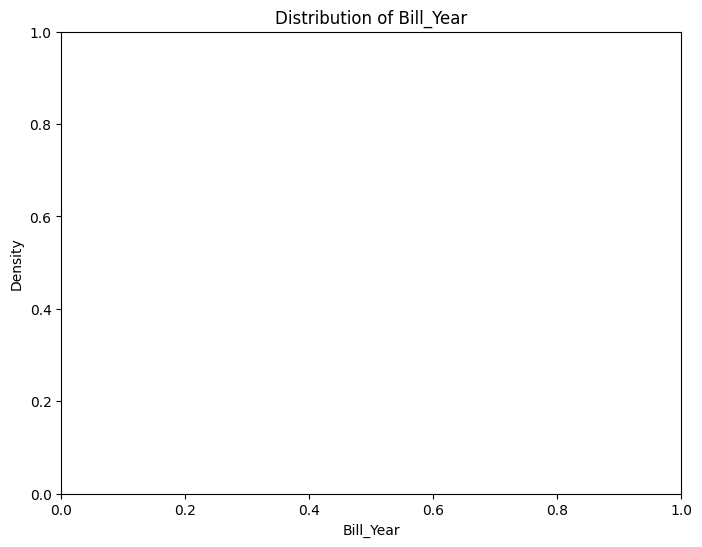

In [16]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

numerical_cols_to_plot = [col for col in numerical_cols if col not in ['Bill_year', 'Bill_day','Bill_month']]

for col in numerical_cols_to_plot:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

<Figure size 1000x600 with 0 Axes>

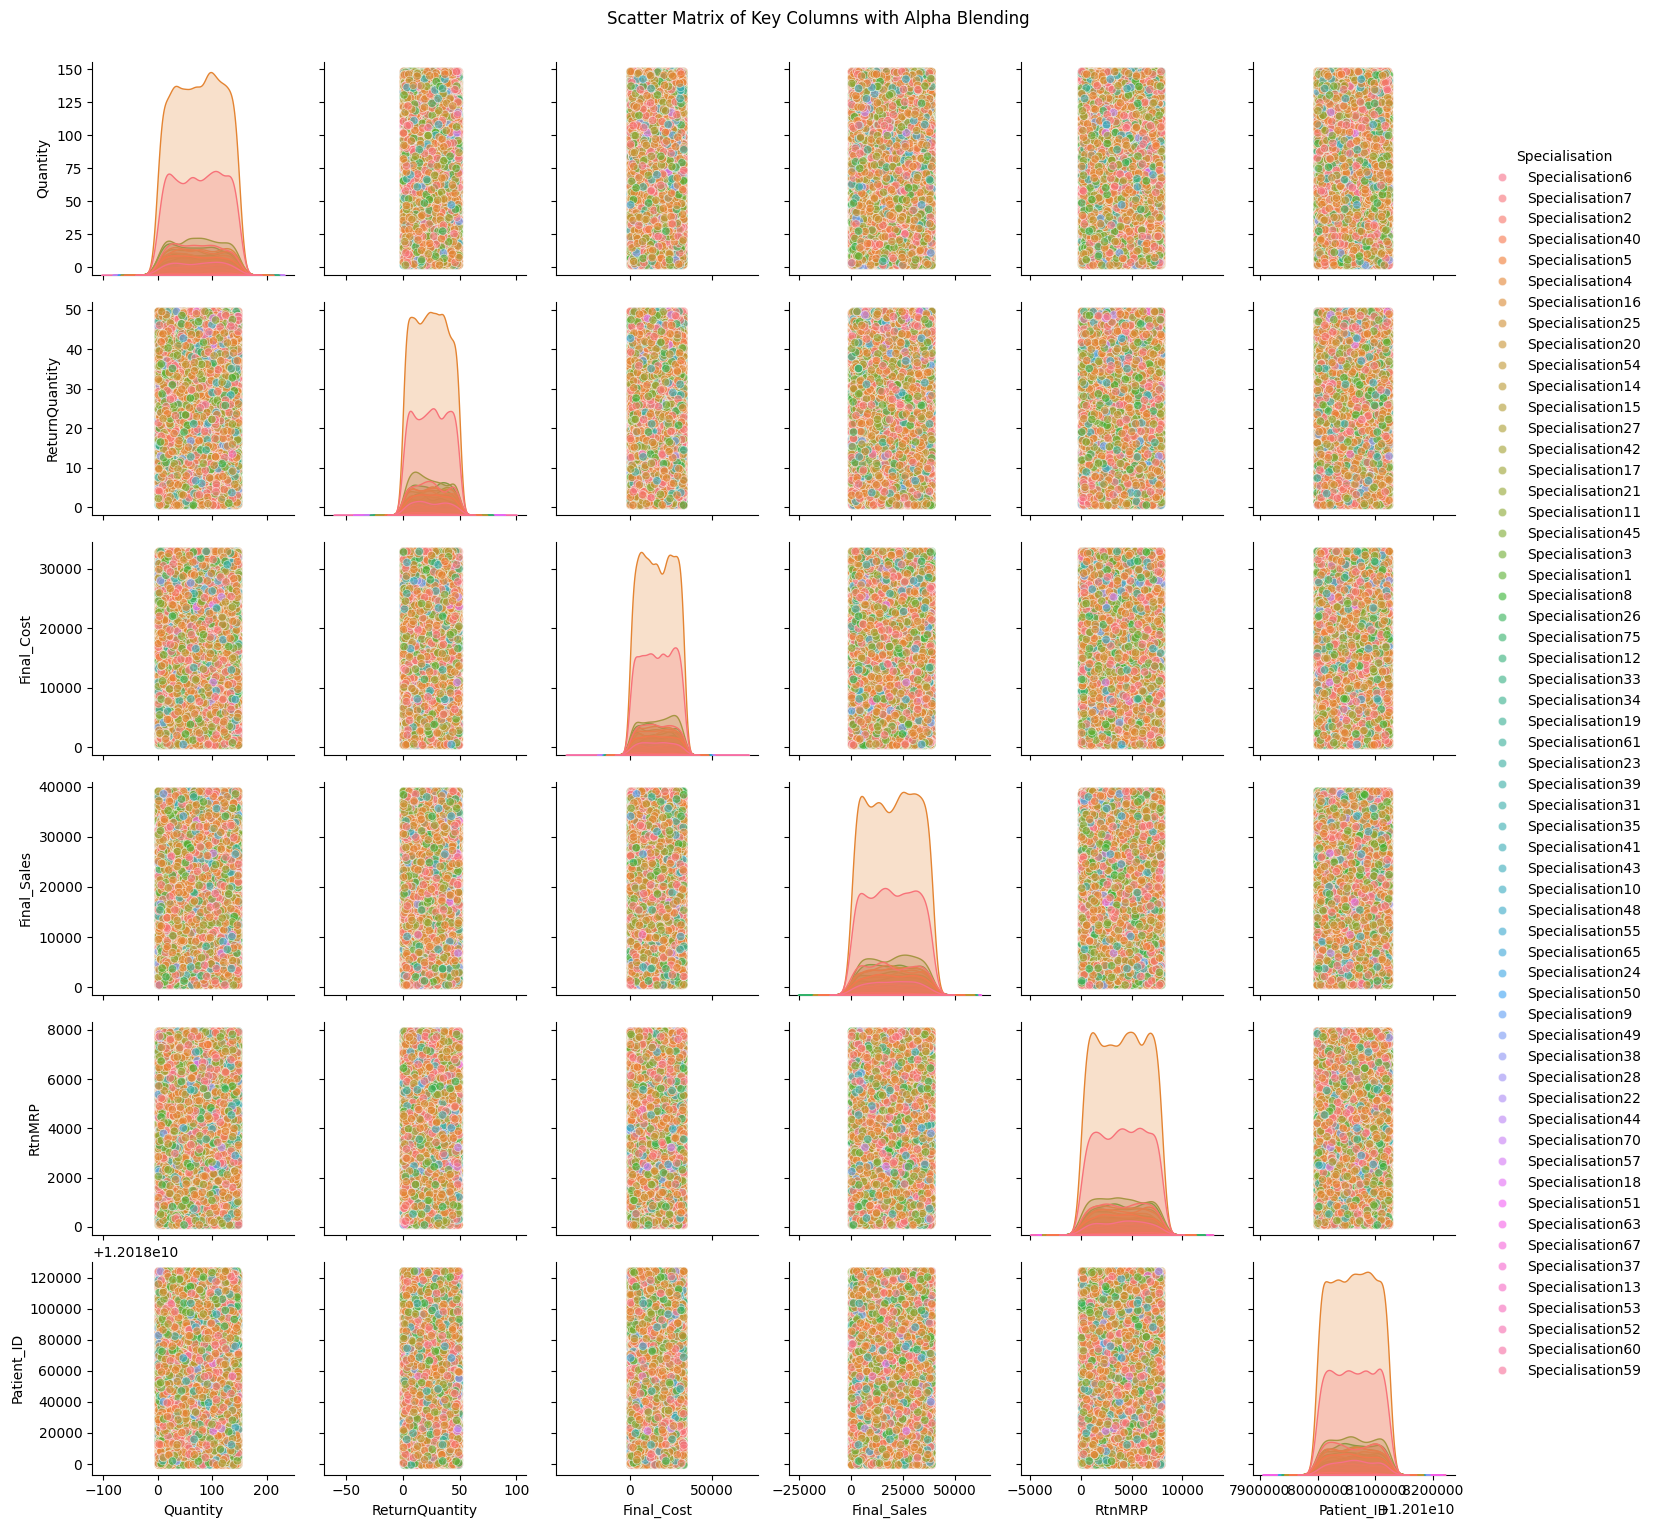

In [56]:
grouped = (
    df.groupby(['Bill_Year', 'Bill_Month']) # Corrected column name to 'Bill_Year'
    .agg({'Quantity': 'sum', 'Final_Sales': 'sum', 'Final_Cost': 'sum', 'ReturnQuantity': 'sum'})
    .reset_index()
)
grouped
cols = ['Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales']

# Create a pairwise scatter plot with hue and alpha blending
plt.figure(figsize=(10, 6))
sns.pairplot(df[cols + ['RtnMRP', 'Dept', 'Typeofsales', 'Patient_ID', 'Specialisation']], # Include 'RtnMRP', 'Dept', 'Typeofsales', 'Patient_ID', and 'Specialisation' in the data passed to pairplot
             hue='Specialisation',      # hue based on Specialisation
             plot_kws={'alpha': 0.6})  # alpha blending for better visibility

plt.suptitle('Scatter Matrix of Key Columns with Alpha Blending', y=1.02)
plt.show()

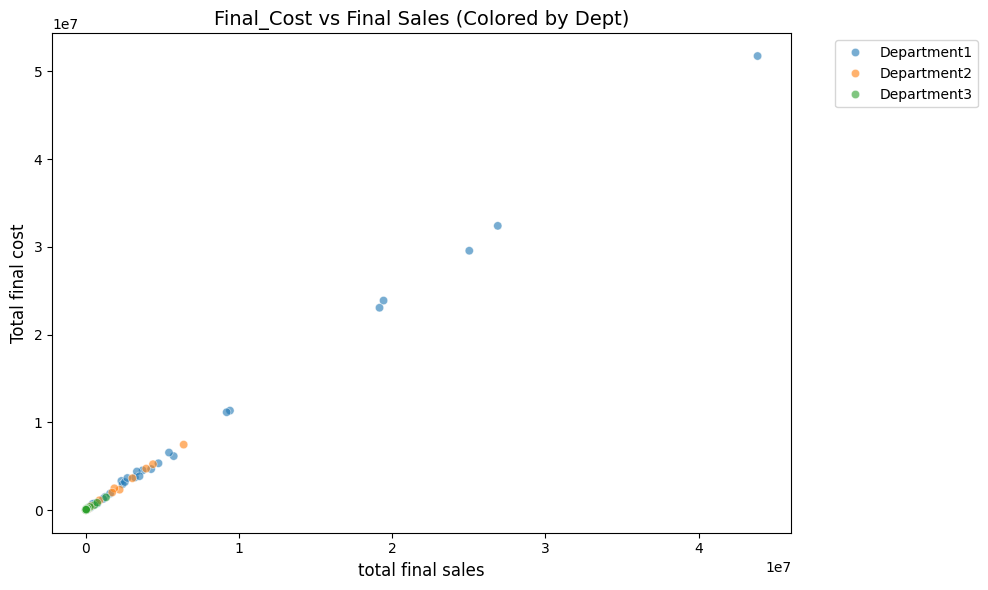

In [39]:
grouped =(
    df.groupby(['Dept','SubCat1','Typeofsales']) # Corrected column names based on df.head()
    .agg({'Quantity':'sum','Final_Sales':'sum','Final_Cost':'sum','ReturnQuantity':'sum'})
    .reset_index()
)
grouped.head()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped, # Corrected syntax
    x='Final_Cost',
    y='Final_Sales',
    hue='Dept', # Using Dept as hue based on original code intent
    alpha=0.6
)

plt.title('Final_Cost vs Final Sales (Colored by Dept)', fontsize=14) # Updated title
plt.ylabel('Total final cost', fontsize=12) # Corrected label
plt.xlabel('total final sales', fontsize=12) # Corrected label
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Axes: xlabel='Quantity', ylabel='Final_Sales'>

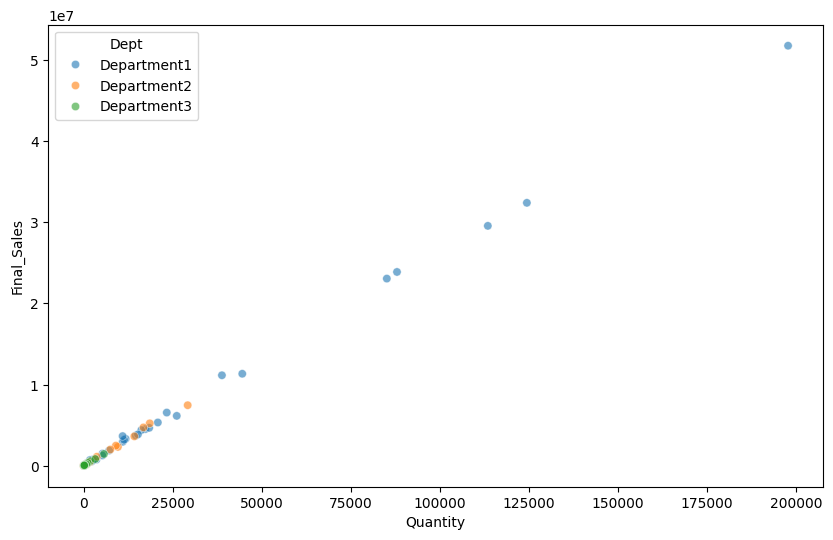

In [40]:
grouped = (
    df.groupby(['Dept', 'SubCat1', 'Typeofsales'])
    .agg({'Quantity': 'sum', 'Final_Sales': 'sum', 'Final_Cost': 'sum', 'ReturnQuantity': 'sum'})
    .reset_index()
)
grouped.head()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped,
    x='Quantity',
    y='Final_Sales',
    hue='Dept',
    alpha=0.6
)

<Axes: xlabel='Quantity', ylabel='ReturnQuantity'>

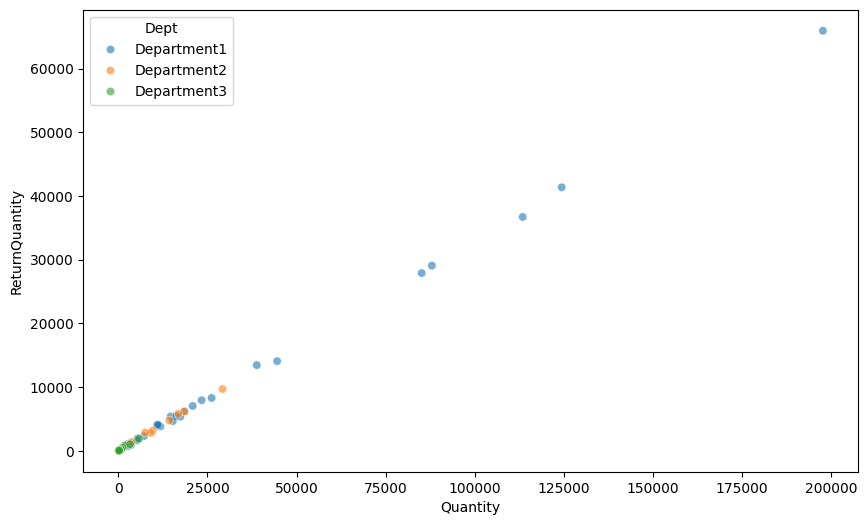

In [41]:
grouped = (
    df.groupby(['Dept', 'SubCat1', 'Typeofsales'])
    .agg({'Quantity': 'sum', 'Final_Sales': 'sum', 'Final_Cost': 'sum', 'ReturnQuantity': 'sum'})
    .reset_index()
)
grouped.head()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped,
    x='Quantity',
    y='ReturnQuantity',
    hue='Dept',
    alpha=0.6
)

<Axes: xlabel='Final_Cost', ylabel='ReturnQuantity'>

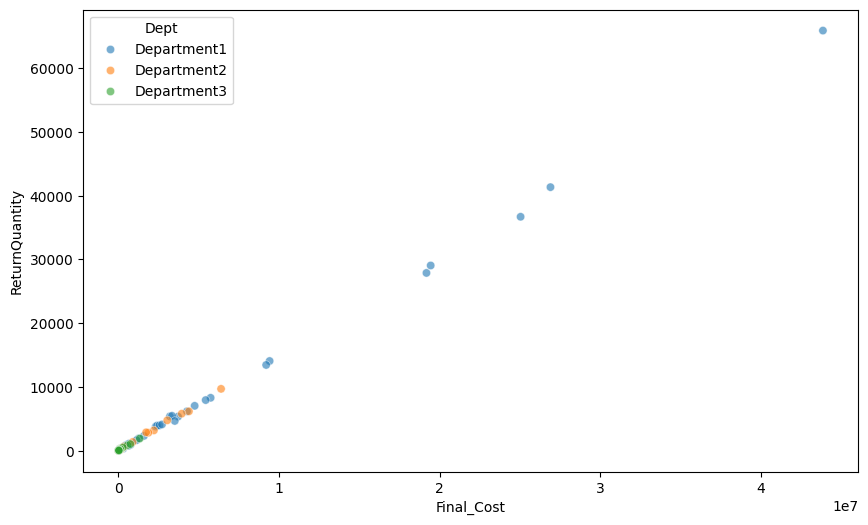

In [42]:
grouped = (
    df.groupby(['Dept', 'SubCat1', 'Typeofsales'])
    .agg({'Quantity': 'sum', 'Final_Sales': 'sum', 'Final_Cost': 'sum', 'ReturnQuantity': 'sum'})
    .reset_index()
)
grouped.head()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped,
    x='Final_Cost',
    y='ReturnQuantity',
    hue='Dept',
    alpha=0.6
)

<Axes: xlabel='Final_Sales', ylabel='ReturnQuantity'>

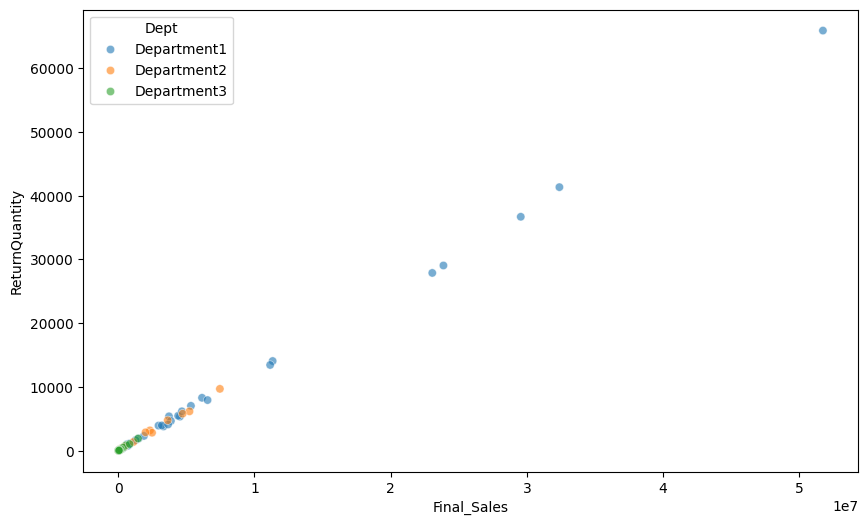

In [43]:
grouped = (
    df.groupby(['Dept', 'SubCat1', 'Typeofsales'])
    .agg({'Quantity': 'sum', 'Final_Sales': 'sum', 'Final_Cost': 'sum', 'ReturnQuantity': 'sum'})
    .reset_index()
)
grouped.head()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped,
    x='Final_Sales',
    y='ReturnQuantity',
    hue='Dept',
    alpha=0.6
)

<Axes: xlabel='Quantity', ylabel='Final_Cost'>

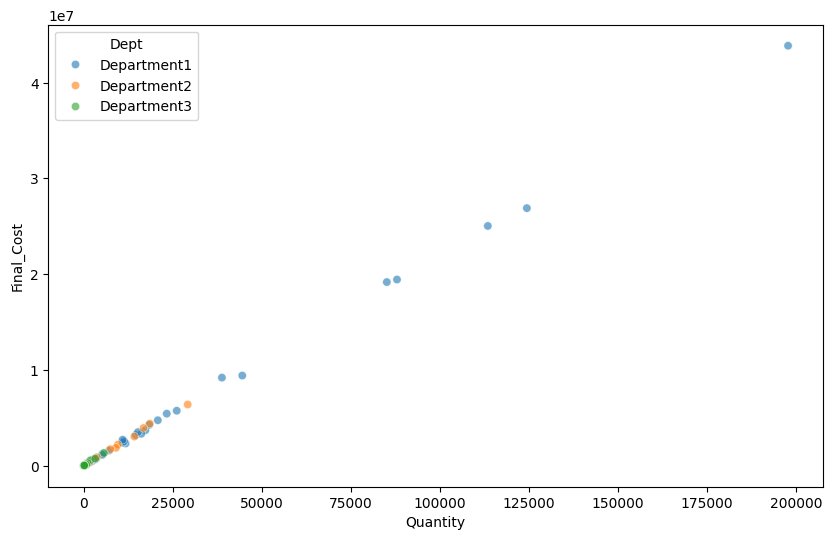

In [44]:
grouped=  (
    df.groupby(['Dept','SubCat1','Typeofsales'])
    .agg({'Quantity':'sum','Final_Sales':'sum','Final_Cost':'sum','ReturnQuantity':'sum'})
    .reset_index()
)
grouped.head()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped,
    x='Quantity',
    y='Final_Cost',
    hue='Dept',
    alpha=0.6
)

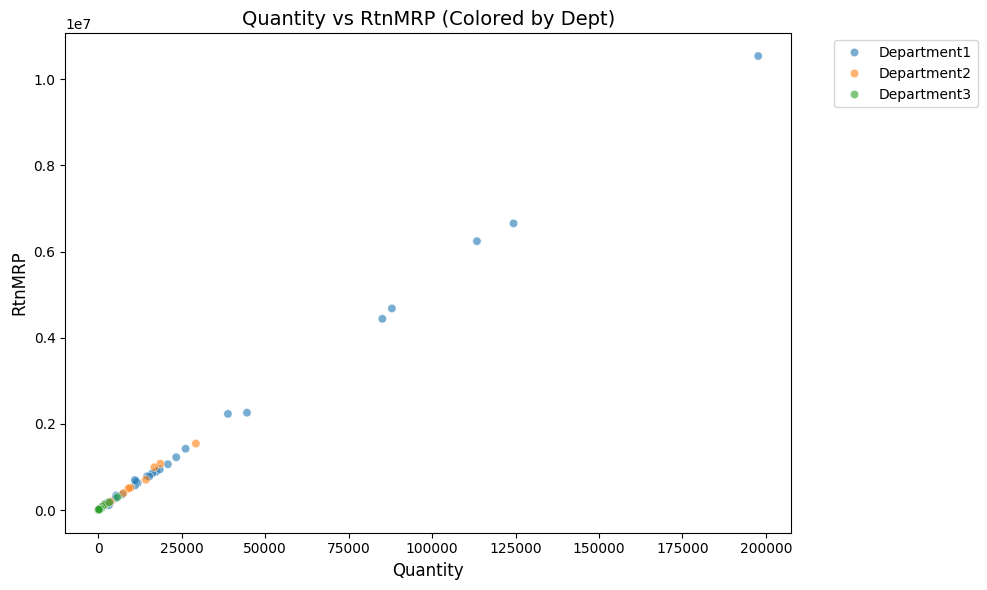

In [46]:
grouped = (
    df.groupby(['Dept', 'SubCat1', 'Typeofsales'])
    .agg({'Quantity': 'sum', 'Final_Sales': 'sum', 'Final_Cost': 'sum', 'ReturnQuantity': 'sum', 'RtnMRP': 'sum'}) # Added 'RtnMRP' to aggregation
    .reset_index()
)
grouped.head()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped,
    x='Quantity',
    y='RtnMRP',
    hue='Dept',
    alpha=0.6
)
plt.title('Quantity vs RtnMRP (Colored by Dept)', fontsize=14) # Added title
plt.xlabel('Quantity', fontsize=12) # Added xlabel
plt.ylabel('RtnMRP', fontsize=12) # Added ylabel
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Added legend
plt.tight_layout() # Adjusted layout
plt.show() # Show the plot

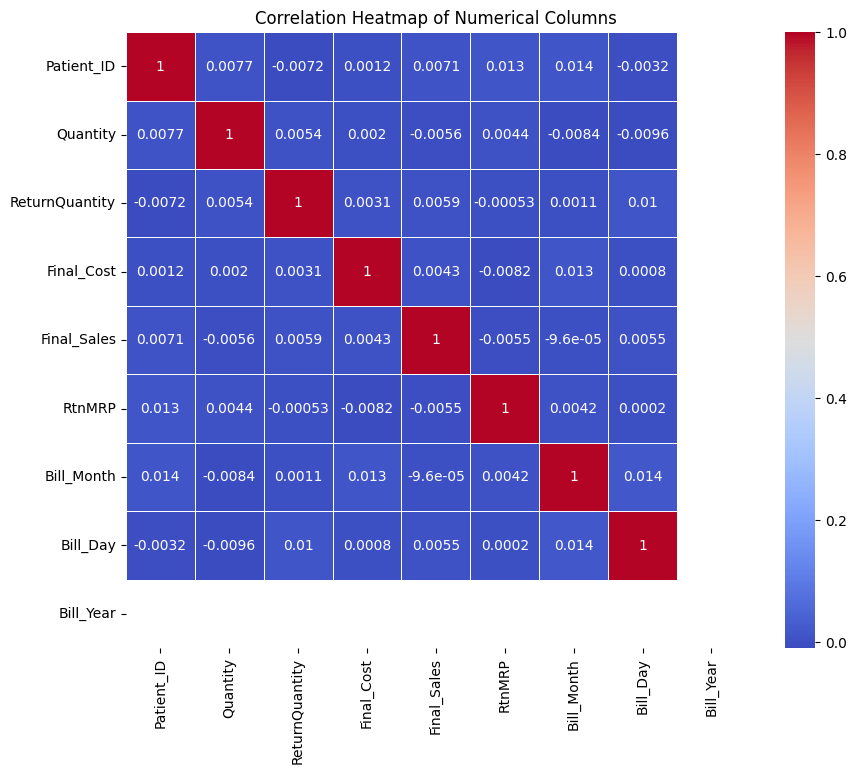

In [36]:
numerical_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()